### Download Data From [Extended Yale Dataset](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html)

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import os
import scipy.io

### Read all images names from each folder 
### make full path to each image

### 38 subject * 64 illumination each of shape (m  rows 192, n cols 168) cropped and alligned


In [2]:
base_pth = "./CroppedYale"
subjects_folders = os.listdir(base_pth)
len(subjects_folders)

# list of lists
subjects_imgs_names = []
# 38 subject 65 images each (some corrupted)
for subject in subjects_folders:
    allFiles = os.listdir(f"./{base_pth}/{subject}") 
    pgms = [ fname for fname in allFiles if fname.endswith('.pgm')]
    subjects_imgs_names.append(pgms)

subjects_imgs_names_flatten = [item for sublist in subjects_imgs_names for item in sublist]



subjects_imgs_pth = []
for name in subjects_imgs_names_flatten:
    folder_name = name.split("_")[0]
    subjects_imgs_pth.append(f"{folder_name}/{name}")



### Read PGM Files

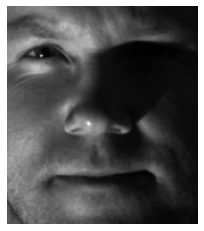

In [3]:
import re
import numpy

def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return numpy.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))



image = read_pgm(f"{base_pth}/{subjects_imgs_pth[150]}", byteorder='<')
plt.figure(figsize=(4., 4.))
plt.axis('off')   
plt.imshow(image, plt.cm.gray)
plt.show()

### Make grid of first image from training subject images (36 subject)

In [4]:
# list of lists of subject imgs
unique_subject = []
for folder in subjects_imgs_names[:36]:
    unique_subject.append(folder[1])

unique_imgs_pth = []
for name in unique_subject:
    folder_name = name.split("_")[0]
    unique_imgs_pth.append(f"{folder_name}/{name}")
    
# unique_imgs_pth[5] 'yaleB06/yaleB06_P00A+000E+90.pgm'

unique_imgs_pgm = []
for i in range(len(unique_imgs_pth)):
    image = read_pgm(f"{base_pth}/{unique_imgs_pth[i]}", byteorder='<')
    unique_imgs_pgm.append(image)
        

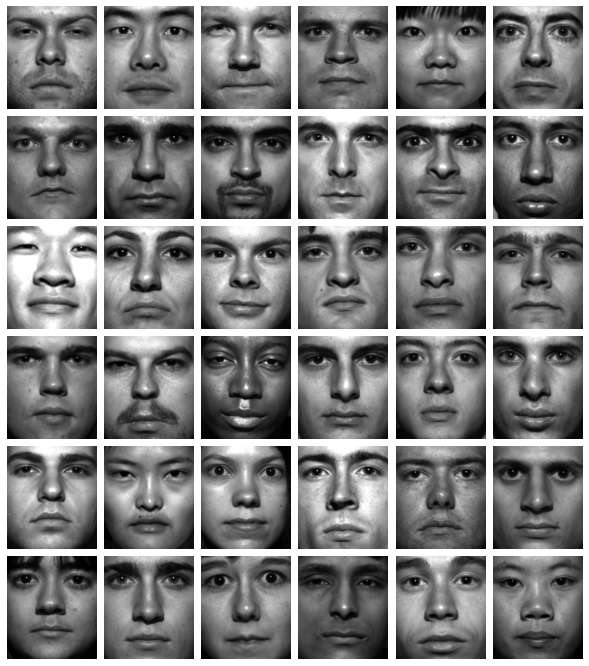

In [5]:
fig = plt.figure(figsize=(12, 12))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(6, 6),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, unique_imgs_pgm):
    # Iterating over the grid returns the Axes.
    ax.axis('off')    
    ax.imshow(im, cmap="gray")

plt.show()


### make grid of yaleB01 subject all images with different illumination

In [6]:
# list of lists of yaleB01 imgs
yaleB01_imgs_pth = []
for name in subjects_imgs_names[0][:-1]: #except ambient img
    folder_name = name.split("_")[0]
    yaleB01_imgs_pth.append(f"{folder_name}/{name}")
    
yaleB01_pgms = []
for i in range(len(yaleB01_imgs_pth)):
    image = read_pgm(f"{base_pth}/{yaleB01_imgs_pth[i]}", byteorder='<')
    yaleB01_pgms.append(image)
        


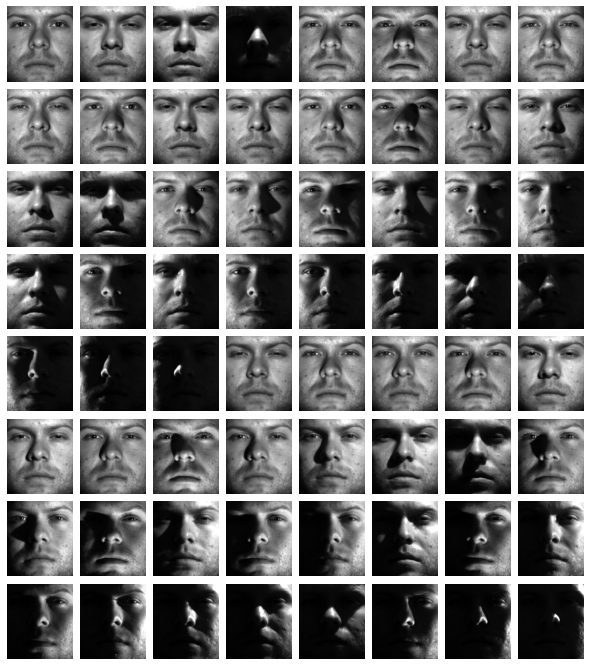

In [7]:
fig = plt.figure(figsize=(12, 12))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, yaleB01_pgms):
    # Iterating over the grid returns the Axes.
    ax.axis('off')    
    ax.imshow(im, cmap="gray")

plt.show()


### X Matrix  for training data (chossing firsr 36 subject from total 38 subject)

In [8]:
base_pth = "./CroppedYale"
subjects_folders = os.listdir(base_pth)
len(subjects_folders)

# list of lists
training_imgs_names = []
# 38 subject 65 images each (some corrupted)
for subject in subjects_folders[:36]:
    allFiles = os.listdir(f"./{base_pth}/{subject}") 
    pgms = [ fname for fname in allFiles if fname.endswith('.pgm')]
    training_imgs_names.append(pgms)

training_imgs_names_flatten = [item for sublist in training_imgs_names for item in sublist]


# 2322 img
training_imgs_pth = []
for name in training_imgs_names_flatten:
    folder_name = name.split("_")[0]
    training_imgs_pth.append(f"{folder_name}/{name}")



2322


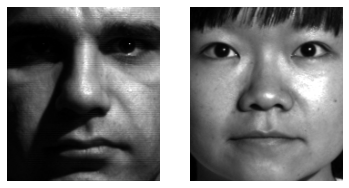

In [9]:
# more efficient pgm reading using matplot
training_pgms = []
for img in training_imgs_pth:
        # image = read_pgm2(f"./{base_pth}/{img}", byteorder='<')
        pgm = plt.imread(f"./{base_pth}/{img}")
        training_pgms.append(pgm)

print(len(training_pgms))     

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(training_pgms[500], cmap="gray")
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(training_pgms[300], cmap="gray")
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()



## Flatten pgms to colums 

(32256,)
(192, 168)


<ipython-input-10-c6b873f17236>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training_pgms_arr = np.array(training_pgms)


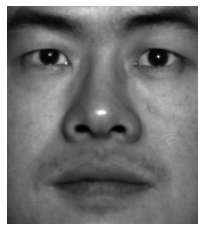

In [10]:
# training_pgms_arr  2322x (192, 168)
training_pgms_arr = np.array(training_pgms)
img_flat =  training_pgms_arr[100].reshape(-1) # 2d to 1d
print(img_flat.shape)

img_reshaped = img_flat.reshape(192, 168)
print(img_reshaped.shape)


plt.figure(figsize=(4., 4.))
plt.axis('off')   
plt.imshow(img_reshaped, plt.cm.gray)
plt.show()


In [11]:
m = 192
n = 168 
training_pgms_arr = np.array(training_pgms) #, dtype=object

training_pgms_vectors = []
for img in training_pgms_arr:
    img_flat = img.flatten()
    training_pgms_vectors.append(img_flat)

training_pgms_vectors = np.array(training_pgms_vectors) #, dtype=object

<ipython-input-11-2ed63833c50f>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training_pgms_arr = np.array(training_pgms) #, dtype=object
<ipython-input-11-2ed63833c50f>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training_pgms_vectors = np.array(training_pgms_vectors) #, dtype=object


### pick random vector and reshape it

(192, 168)


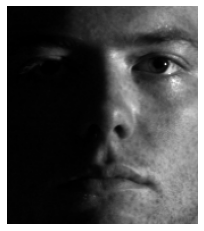

In [12]:
# X = training_pgms_vectors >> reshape and vector to (192,168)
rand_int = np.random.randint(0,len(training_pgms_arr))
img_reshaped = training_pgms_vectors[rand_int].reshape(m,n)
print(img_reshaped.shape)


plt.figure(figsize=(4., 4.))
plt.axis('off')   
plt.imshow(img_reshaped, plt.cm.gray)
plt.show()    


In [13]:
# print(training_pgms_vectors[0][:])
# print(len(training_pgms_vectors))
# print(len(training_pgms_vectors[0][:]))

corrupted_imgs_idx = []
for idx, vector in enumerate(training_pgms_vectors):
    if len(vector) == 307200:
        # print(f"{idx}")
        corrupted_imgs_idx.append(idx)


fixed_training_pgms_vectors = np.delete(training_pgms_vectors, corrupted_imgs_idx)
        

In [14]:
for idx, vector in enumerate(fixed_training_pgms_vectors):
    if len(vector) == 307200:
        print(f"{idx}")
    

In [15]:
# Turn to numppy array of lists

vectors_list = []
for vector in fixed_training_pgms_vectors:
    vectors_list.append(vector.tolist())

# n_imgs x (nxm)
print(np.array(vectors_list).shape)  

vectors_list =  np.array(vectors_list).T # (nxm) x k
print(np.array(vectors_list).shape)   

(2296, 32256)
(32256, 2296)


shape of avgface:  (32256,)
(192, 168)


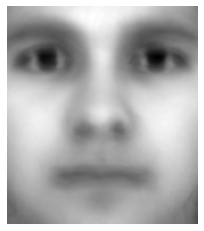

In [16]:
# training_pgms_vectors[0] >> 1d [row1, row2, row3, ....]
# training_pgms_vectors[0].reshape(192,168) >> image (192 rows , 168 cols)
# print(len(fixed_training_pgms_vectors)) 2296 image

avg_face = np.mean(vectors_list, axis=1)

print("shape of avgface: ",avg_face.shape)

img_reshaped = avg_face.reshape(m,n)
print(img_reshaped.shape)

plt.figure(figsize=(4., 4.))
plt.axis('off')   
plt.imshow(img_reshaped, plt.cm.gray)
plt.show()    



## Singular Value Decomposition (SVD) ~ PCA (Eigen Analysis)

            > write some eqns

In [17]:
avg_face_list  = []

# avg_face (32256,)

for i in range(len(vectors_list[1])):
    avg_face_list.append(avg_face.tolist())

avg_face_list =  np.array(avg_face_list).T
print(avg_face_list.shape)
    
    

(32256, 2296)


In [18]:
X = vectors_list - avg_face_list
print(X.shape)

(32256, 2296)


U shape:  (32256, 2296)
S shape:  (2296,)
VT shape:  (2296, 2296)


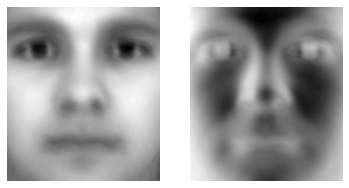

In [20]:
avg_face = np.mean(vectors_list, axis=1)

U, S, VT = np.linalg.svd(X,full_matrices=0)
print("U shape: ",U.shape)
print("S shape: ",S.shape)
print("VT shape: ",VT.shape)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(avg_face.reshape(m,n))
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)))
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()


## Implementation of SVD using Power iteration algorithm


In [ ]:
def svd_simultaneous_power_iteration(A, k, epsilon=0.00001):
    #source http://mlwiki.org/index.php/Power_Iteration
    n_orig, m_orig = A.shape
    if k is None:
        k=min(n_orig,m_orig)
        
    A_orig=A.copy()
    if n_orig > m_orig:
        A = A.T @ A
        n, m = A.shape
    elif n_orig < m_orig:
        A = A @ A.T
        n, m = A.shape
    else:
        n,m=n_orig, m_orig
        
    Q = np.random.rand(n, k)
    Q, _ = np.linalg.qr(Q)
    Q_prev = Q
 
    for i in range(1000):
        Z = A @ Q
        Q, R = np.linalg.qr(Z)
        # can use other stopping criteria as well 
        err = ((Q - Q_prev) ** 2).sum()
        Q_prev = Q
        if err < epsilon:
            break
            
    singular_values=np.sqrt(np.diag(R))    
    if n_orig < m_orig: 
        left_vecs=Q.T
        #use property Values @ V = U.T@A => V=inv(Values)@U.T@A
        right_vecs=np.linalg.inv(np.diag(singular_values))@left_vecs.T@A_orig
    elif n_orig==m_orig:
        left_vecs=Q.T
        right_vecs=left_vecs
        singular_values=np.square(singular_values)
    else:
        right_vecs=Q.T
        #use property Values @ V = U.T@A => U=A@V@inv(Values)
        left_vecs=A_orig@ right_vecs.T @np.linalg.inv(np.diag(singular_values))

    return left_vecs, singular_values, right_vecs    

### Calcualtion of k eigenvectors and eigen values 
- K   > time
- 20  > 4.5 sec
- 50  > 10 sec
- 80  > 22 sec 
- 100 > 30 sec
- 120 > 1 min 3 sec 
- 150 > 59 sec 
- 180 > 1 min 39 sec 
- 200 > 1 min 25 sec 
- 800 > 7 min 42 sec

In [ ]:
left_vecs_50, singular_values_50, right_vecs_50 = svd_simultaneous_power_iteration(X, 50)

In [ ]:
left_vecs_150, singular_values_150, right_vecs_150 = svd_simultaneous_power_iteration(X, 150)


In [ ]:
left_vecs_180, singular_values_180, right_vecs_180 = svd_simultaneous_power_iteration(X, 180)

In [ ]:
left_vecs_200, singular_values_200, right_vecs_200 = svd_simultaneous_power_iteration(X, 200)

In [ ]:
left_vecs_800, singular_values_800, right_vecs_800 = svd_simultaneous_power_iteration(X, 800)

U shape:  (32256, 80)
S shape:  (80,)
VT shape:  (80, 2296)


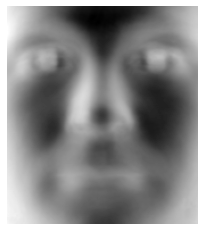

In [ ]:
print("U shape: ",left_vecs_50.shape)
print("S shape: ",singular_values_50.shape)
print("VT shape: ",right_vecs_50.shape)

plt.imshow(np.reshape(left_vecs_50[:,0],(m,n)), cmap="gray")
plt.axis('off')
plt.show()


### np.svd and our svd reached very close performance estimating the `eigenfaces` 
> the cell bellow show random eigenfaces from both methods

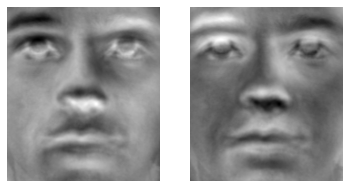

In [ ]:

rand_int = np.random.randint(0,80)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(left_vecs_200[:,rand_int],(m,n)))
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,rand_int],(m,n)))
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

# left_ours                 #np.svd

130


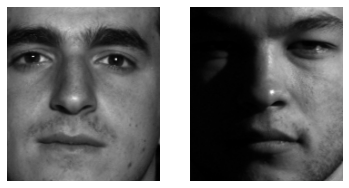

(32256,)
(192, 168)


<ipython-input-195-264a31edd1b3>:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  testing_pgms_arr = np.array(testing_pgms)


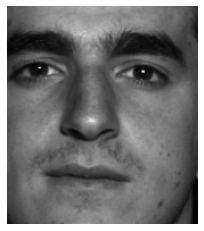

In [ ]:
base_pth = "./CroppedYale"
subjects_folders = os.listdir(base_pth)
len(subjects_folders)

# list of lists
testing_imgs_names = []
# 38 subject 65 images each (some corrupted)
for subject in subjects_folders[36: ]:
    allFiles = os.listdir(f"./{base_pth}/{subject}") 
    pgms = [ fname for fname in allFiles if fname.endswith('.pgm')]
    testing_imgs_names.append(pgms)

testing_imgs_names_flatten = [item for sublist in testing_imgs_names for item in sublist]


# 2322 img
training_imgs_pth = []
for name in testing_imgs_names_flatten:
    folder_name = name.split("_")[0]
    training_imgs_pth.append(f"{folder_name}/{name}")


# more efficient pgm reading using matplot
testing_pgms = []
for img in training_imgs_pth:
        # image = read_pgm2(f"./{base_pth}/{img}", byteorder='<')
        pgm = plt.imread(f"./{base_pth}/{img}")
        testing_pgms.append(pgm)

print(len(testing_pgms))     

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(testing_pgms[100], cmap="gray")
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(testing_pgms[50], cmap="gray")
img_u1.set_cmap('gray')
plt.axis('off')
plt.show()



# training_pgms_arr  2322x (192, 168)
testing_pgms_arr = np.array(testing_pgms)
img_flat =  testing_pgms_arr[100].reshape(-1) # 2d to 1d
print(img_flat.shape)
img_reshaped = img_flat.reshape(192, 168)
print(img_reshaped.shape)
plt.figure(figsize=(4., 4.))
plt.axis('off')   
plt.imshow(img_reshaped, plt.cm.gray)
plt.show()




### reconstructing the test image by using Ur of eigenvectors `tradeoff between sparsity and accuracy`

> Trick on projecting is to multuiply  `(U.T x X) = alpha` first then multiply `U x alpha`
>
>This reduce reconstruction time from `3 min 7 sec` to `1.5 sec` 

### reconstruction using np.svd

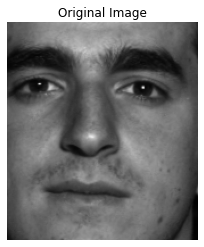

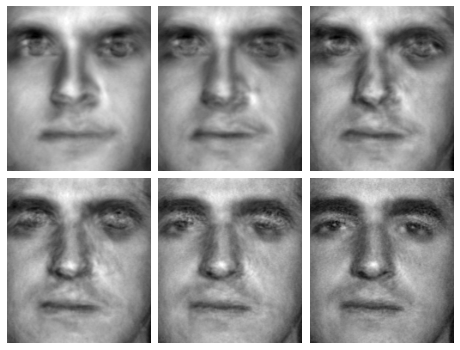

In [ ]:
## Now show eigenface reconstruction of image that was omitted from test set

testFace =  img_flat =  testing_pgms_arr[100].reshape(-1) # 2d to 1d# First face of person 37
plt.imshow(np.reshape(testFace,(m,n)))
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

reconstructions = []
r_list = [50, 100, 200, 400, 800, 1600]
testFaceMS = testFace - avg_face
for r in r_list:
    alpha = U[:,:r].T @ testFaceMS
    reconFace = avg_face + U[:,:r]  @ alpha
    reconstructions.append(np.reshape(reconFace,(m,n)))



fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, reconstructions):
    # Iterating over the grid returns the Axes.
    ax.axis('off')    
    ax.imshow(im, cmap="gray")

plt.show()



### reconstruction using our implementation of svd 
> Althought the eigen vector from our method is only calculated up to 800 component compared to 2296 using np.svd; we achieved similar reconstruction using r values upto 800

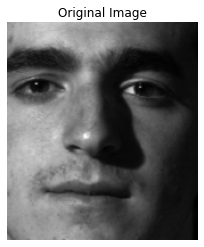

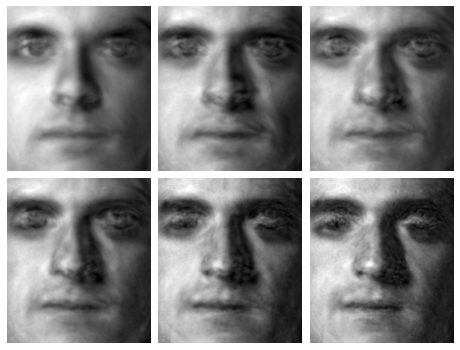

In [ ]:
## Now show eigenface reconstruction of image that was omitted from test set

testFace =  img_flat =  testing_pgms_arr[80].reshape(-1) # 2d to 1d# First face of person 37
plt.imshow(np.reshape(testFace,(m,n)))
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

reconstructions = []
r_list = [50, 100, 150 , 200, 400, 800]
testFaceMS = testFace - avg_face
for r in r_list:
    alpha = left_vecs_800[:,:r].T @ testFaceMS
    reconFace = avg_face + left_vecs_800[:,:r]  @ alpha
    reconstructions.append(np.reshape(reconFace,(m,n)))



fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, reconstructions):
    # Iterating over the grid returns the Axes.
    ax.axis('off')    
    ax.imshow(im, cmap="gray")

plt.show()



## X_test Matrix Reconstruction

In [ ]:
m = 192
n = 168 
# testing_pgms_arr
testing_pgms_arr = np.array(testing_pgms) #, dtype=object
# testing_pgms_arr = np.array(testing_pgms)

testing_pgms_vectors = []
for img in testing_pgms_arr:
    img_flat = img.flatten()
    testing_pgms_vectors.append(img_flat)

testing_pgms_vectors = np.array(testing_pgms_vectors) #, dtype=object

(192, 168)


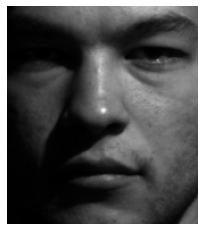

In [ ]:
# X = training_pgms_vectors >> reshape and vector to (192,168)
rand_int = np.random.randint(0,len(testing_pgms_arr))
img_reshaped = testing_pgms_vectors[rand_int].reshape(m,n)
print(img_reshaped.shape)


plt.figure(figsize=(4., 4.))
plt.axis('off')   
plt.imshow(img_reshaped, plt.cm.gray)
plt.show()    


(128, 32256)
(32256, 128)
(32256, 128)
(32256, 128)
(192, 168)


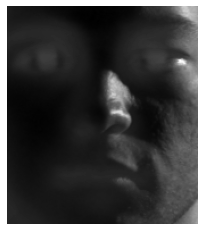

In [ ]:
# Turn to numppy array of lists
vectors_list = []
for vector in testing_pgms_vectors:
    vectors_list.append(vector.tolist())

# n_imgs x (nxm)
print(np.array(vectors_list).shape)  

vectors_list =  np.array(vectors_list).T # (nxm) x k
print(np.array(vectors_list).shape)   

# copy avg face n times
avg_face_list  = []
for i in range(len(vectors_list[1])):
    avg_face_list.append(avg_face.tolist())

avg_face_list =  np.array(avg_face_list).T
print(avg_face_list.shape)
    
X_test = vectors_list - avg_face_list
print(X_test.shape)


# X = training_pgms_vectors >> reshape and vector to (192,168)
rand_int = np.random.randint(0,len(testing_pgms_arr))
img_reshaped = X_test.T[rand_int].reshape(m,n)
print(img_reshaped.shape)


plt.figure(figsize=(4., 4.))
plt.axis('off')   
plt.imshow(img_reshaped, plt.cm.gray)
plt.show()    


### Projecting all 128 test imgs `64 each person` on only 4 components of eigenfaces matrix results in only 4 values for each img and by plotting clusters of projections of combinations of two components we can see that:

**principal components (5 , 6) and (6 , 7)  can be used to recognize the two persons from each other with great accuracy using `linear regression` or `svm` or `k-means clustering` or any ML algorithm and no need to cover 90% of eigenfaces**

> project new image on PC 5, 6 will result in only 2x1 array a very simple ML algorithm can classify the persons from each other without fancy matching CV algorithms.    

(4, 64)


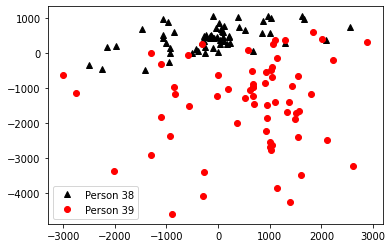

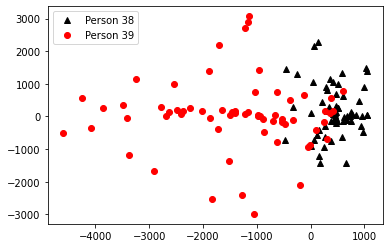

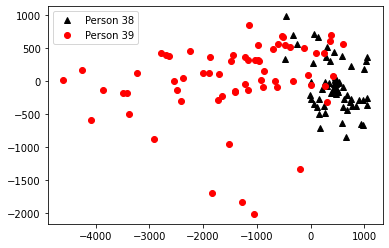

In [ ]:


PCAmodes = [5,6,7,8]

PCA_P1 = U[ : , PCAmodes-np.ones_like(PCAmodes)].T @ X_test[ : ,    : 64]
PCA_P2 = U[ : , PCAmodes-np.ones_like(PCAmodes)].T @ X_test[ : , 64 :   ]

print(PCA_P1.shape)


plt.plot(PCA_P1[ 0, : ], PCA_P1[ 1, : ],'^',color='k',label='Person 38')
plt.plot(PCA_P2[ 0, : ], PCA_P2[ 1, : ],'o',color='r',label='Person 39')
plt.legend()
plt.show()


plt.plot(PCA_P1[ 1, : ], PCA_P1[ 2, : ],'^',color='k',label='Person 38')
plt.plot(PCA_P2[ 1, : ], PCA_P2[ 2, : ],'o',color='r',label='Person 39')
plt.legend()
plt.show()


plt.plot(PCA_P1[ 1, : ], PCA_P1[ 3, : ],'^',color='k',label='Person 38')
plt.plot(PCA_P2[ 1, : ], PCA_P2[ 3, : ],'o',color='r',label='Person 39')
plt.legend()
plt.show()





In [7]:
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

def plot_confusion(y_test, yfit):
    mat = confusion_matrix(y_test, yfit)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels= [0,1],
                yticklabels= [0,1])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    

def fit_svc_model(x_train,x_test,y_train,y_test):
    
    svc = SVC(kernel='rbf', class_weight='balanced')
    model = make_pipeline(svc)
    
    param_grid = {'svc__C': [1, 5, 10, 50],
                  'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
    grid = GridSearchCV(model, param_grid)
    
    %time grid.fit(x_train, y_train)
    print(grid.best_params_)
    
    model = grid.best_estimator_
    yfit = model.predict(x_test)
    
    return yfit


def get_roc_data(start=5, end=6, confution=False):
    PCAmodes = [i for i in range(start,end)]
    PCA_P2 = U[ : , PCAmodes-np.ones_like(PCAmodes)].T @ X_test[ : , 64 :   ]
    PCA_P1 = U[ : , PCAmodes-np.ones_like(PCAmodes)].T @ X_test[ : ,    : 64]

    df_38 = pd.DataFrame(PCA_P1.T)
    df_38['Person'] = 0
    df_39 = pd.DataFrame(PCA_P2.T)
    df_39['Person'] = 1
    df = pd.concat([df_38,df_39], axis=0)

    df_y = df.pop('Person')
    df_x = df
    
    x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=40)
    yfit = fit_svc_model(x_train,x_test,y_train,y_test)
    if confution == True:
        plot_confusion(y_test, yfit)
        

    return y_test, yfit

Wall time: 464 ms
{'svc__C': 1, 'svc__gamma': 0.0005}


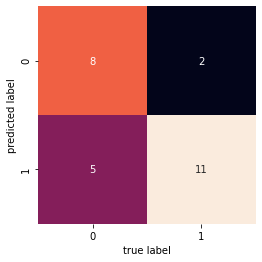

Wall time: 368 ms
{'svc__C': 5, 'svc__gamma': 0.0001}


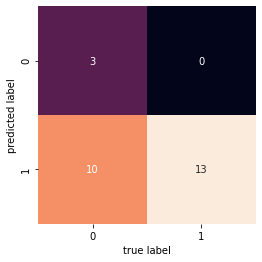

Wall time: 345 ms
{'svc__C': 1, 'svc__gamma': 0.005}


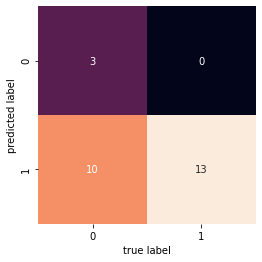

Wall time: 361 ms
{'svc__C': 1, 'svc__gamma': 0.005}


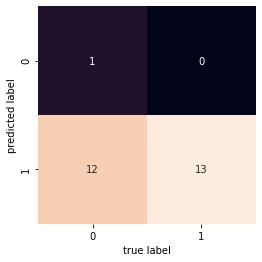

In [ ]:
y_test1, yfit1 = get_roc_data(5,6)
y_test2, yfit2 = get_roc_data(5,8)
y_test3, yfit3 = get_roc_data(5,15)
y_test4, yfit4 = get_roc_data(5,20)

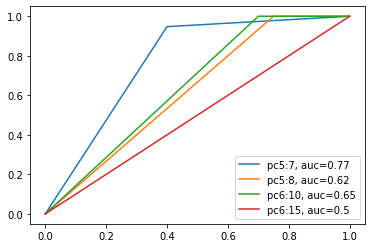

In [ ]:
from sklearn import metrics


plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(y_test1, yfit1)
auc = metrics.roc_auc_score(y_test1, yfit1)
plt.plot(fpr,tpr,label="pc5:7, auc="+str(np.round(auc,2)))

fpr, tpr, thresh = metrics.roc_curve(y_test2, yfit2)
auc = metrics.roc_auc_score(y_test2, yfit2)
plt.plot(fpr,tpr,label="pc5:8, auc="+str(np.round(auc,2)))

fpr, tpr, thresh = metrics.roc_curve(y_test3, yfit3)
auc = metrics.roc_auc_score(y_test3, yfit3)
plt.plot(fpr,tpr,label="pc6:10, auc="+str(np.round(auc,2)))

fpr, tpr, thresh = metrics.roc_curve(y_test4, yfit4)
auc = metrics.roc_auc_score(y_test4, yfit4)
plt.plot(fpr,tpr,label="pc6:15, auc="+str(np.round(auc,2)))

plt.legend(loc=0)